# Clustering
Once the parameter space is well defined and data has been collected, it is the aim to estimate the number of sources and the source parameters from the given parameter space as an unsupervised learning task, with no prior information given on the unknown parameters.
The problem of finding clusters in a set of data points can be approached by using probabilistic techniques or non-probabilistic techniques. An example of a non-probabilistic clustering technique is the $k$-means algorithm (Lloyd, 1982). The immediate $k$-means algorithm does need an input that specifies the number of clusters to estimate. In this study we have modelled the panning parameters distribution using the probabilistic clustering technique, as a mixture of Gaussians. We have found that the $K$-means is a good algorithm for initializing the EM-algorithm in the given context.

## $K$-means clustering
We consider the problem of identifying clusters of data points in a multidimensional space. We observe $N$ observations of the data set {$\mathbf{x}_1,\dots,\mathbf{x}_N$}. In general the variable $\mathbf{x}$ is $D$-dimensional. However, we have defined two parameters in this study ($D=2$). Each cluster center is represented by $\mathbf{\mu}_k$ after we have assigned each point in the data set to a given cluster. The assignment of a data point $\mathbf{x}_n$ to cluster $k$ is described by the binary indicator variable $b_{n,k} \in \{0,1\}$. The aim is to minimize the sum of squares distance from each data point to its closest center vector $\mathbf{\mu}_k$.  We can now describe a cost function $J$ as,
\begin{equation}
    J = \sum_{n=1}^{N}\sum_{k=1}^{K} b_{n,k} ||\mathbf{x}_n-\mathbf{\mu}_k||^2
\end{equation}
Finding the values of {$b_{n,k}$} and {$\mathbf{\mu}_k$} that will minimize $J$ is done by using an iterative optimization procedure, involving two steps for each iteration. To begin the iterations, some initial values are assigned to $\mathbf{\mu}_k$. The two iterative steps are,
* Minimize $J$ with respect to $b_{n,k}$, with $\mathbf{\mu}_k$ fixed.
* Minimize $J$ with respect to $\mathbf{\mu}_k$, with $b_{n,k}$ fixed.

The assignment of the $n$th data point to the closest cluster center can be expressed as,
\begin{equation}
    b_{n,k}  = 
    \begin{cases}
        1, & \text{if}\ k = \underset{j}{\arg\min}\ ||\mathbf{x}_n-\mathbf{\mu}_j||^2 \\
        0, & \text{otherwise}\
    \end{cases}
\end{equation}
Since the cost function $J$ is a quadratic function of $\mathbf{\mu}_k$ we differentiate with respect to $\mathbf{\mu}_k$ and set it to zero,
\begin{equation}
    \frac{d}{d\mathbf{\mu}_k}J = 2 \sum_{n=1}^{N} b_{n,k} (\mathbf{x}_n-\mathbf{\mu}_k) = 0
\end{equation}
and solve for $\mathbf{\mu}_k$,
\begin{equation}
    \mathbf{\mu}_k  = \frac{ \sum_{n=1}^{N} b_{n,k}\mathbf{x}_n }{\sum_{n=1}^{N} b_{n,k}}
\end{equation}
which expresses that $ \mathbf{\mu}_k $ is the mean of all data points $\mathbf{x}_n$ assigned to cluster $k$. The iteration over these two steps are guaranteed to reach convergence.  The $K$-means assigns every data point uniquely to one cluster, and it is not clear that a data point which is placed midway between two cluster centers is assigned appropriately, but by using probabilistic models such as the Gaussian mixture model (GMM), the assigments can reflect this level of uncertainty.
For initialization of the EM-algorithm by deliberately overfitting, i.e. choosing a $K$ much larger than the expected value, the $K$-means algorithm assures that the true parameter are among the estimates, making it convenient to use it for initialization of the GMM-EM algorithm before aplplying the MAP model selection to the GMM-model. 


### Model selection using $K$-means
It is possible to evaluate the $k$-means for different number of clusters and then choose the optimal number of clusters based on the variance ratio criterion (Calinski, T., and J. Harabasz). The variance ratio criterion (VRC) is based on the ratio between the overall between-cluster variance and the overall within-cluster variance.   
We run a short experiment with 7 sources.

> In kmeans/loopBody (line 468)
  In internal.stats.parallel.smartForReduce (line 136)
  In kmeans (line 335)
  In clustering.evaluation.CalinskiHarabaszEvaluation/evalklist (line 109)
  In clustering.evaluation.CalinskiHarabaszEvaluation (line 83)
  In evalclusters (line 172)
centers =
    0.0017   -0.0011
  -20.0001    4.0052
  -29.9911    6.0053
   19.9500   -3.6923
    9.9814   -3.0014
   -9.9913    3.0118
   30.0820   -5.7984
eva = 
  CalinskiHarabaszEvaluation with properties:

    NumObservations: 27944
         InspectedK: [1×25 double]
    CriterionValues: [1×25 double]
           OptimalK: 7


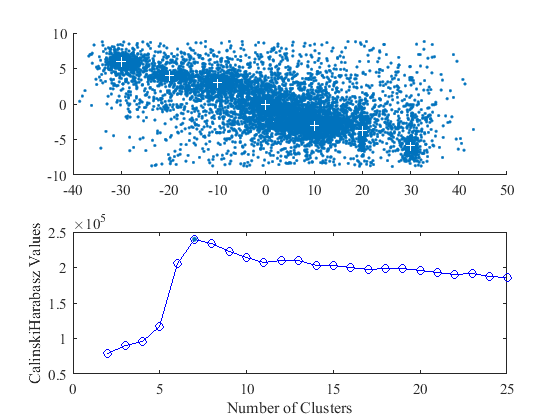

In [1]:
cd /home/jacob/panning_project/test_programs
load mats/panning_data2.mat;
X = panning_data;
% Calinski Harabasz Evaluation
eva = evalclusters(X,'kmeans','CalinskiHarabasz','KList',[1:25]);
optimalK = eva.OptimalK;
critVal = eva.CriterionValues;
optimalVal = critVal(optimalK);

[ndx,centers] = kmeans(X,optimalK,'Distance','cityblock','Replicates',12);
centers

figure(1);
subplot(211); scatter(X(:,1),X(:,2),'.'); hold on;
              plot(centers(:,1),centers(:,2),'k+','linewidth',2);
              xlabel('Amplitude Angle [deg.]'); xlim([-40 40]);
              ylabel('Delay [samples]'); 
subplot(212); plot(eva);grid on;
eva


From the scatter plot we can see that the correct number of clusters have been found in this specific case. However, the $K$-means clustering algorithm can be stuck in a local minimum rather than the global and it is therefore dependent on the initialization to be well considered. An initialization of the $K$-means have been proposed as the $K$-means++ algorithm by (David Arthur and Sergei Vassilvitskii, 2006), a variant that chooses centers at random from the data points, but weighs the data points according to their squared distance squared from the closest center already
chosen. This gives a faster convergence and overcomes some of the local minimum problems. Although the $K$-means clustering algorithm offers no accuracy guarantee, its simplicity is very appealing in practice, thus it is widely used for clustering.

## Finite Mixtures
The research issue of order selection is very relevant, when aiming to jointly estimate source parameters and number of sources in the stereophonic mixture. We can describe the sterophonic mixture parameter space as a finite mixture of $k$ random sources described as probability density functions, 

$$p_i(\mathbf{x}),\quad i=1,\dots,k$$

We observe a set of random independent distributed samples, coming from these probability density functions.
We define the prior probability of observing data from source $s_i$ as $p(s_i) = \alpha_i$, and the conditional probability of the data given source $s_i$ is $p(\mathbf{x}|s_i) = p_i(\mathbf{x})$, thus the joint probability $p(\mathbf{x},s_i)$ is expressed as $\alpha_ip_i(\mathbf{x})$. Finally, the unconditional probability density is,

$$p(\mathbf{x}) = \sum_{i=1}^{k} \alpha_ip_i(\mathbf{x})$$

Which means we that the unconditional density is a finite mixture of component densities $p_i(\mathbf{x})$ weighted by their prior, referred to as the mixing probabilities which we denote $\alpha_i$ for the $i$th source. The mixing probabilities has the general constraint of summing to one,

$$\sum_{i=1}^{k} \alpha_i = 1 \quad \text{and} \quad 0\leq \alpha_i \leq 1 $$

as any probability the mixing probability is required to take a value between 0 and 1.
The finite mixture in this general form is possible to parameterize with the unknown parameters and by applying some model to the distribution, we can build a convenient estimator, as we will do in the following section.

### Parameterization of the finite mixtures of Gaussians
The unknown parameter vector is denoted by $\boldsymbol{\mathbf{\theta}}$. In general for a finite mixture model it will be consisting of the mixing probability and the unknown parameters,

$$\boldsymbol{\mathbf{\theta}} = \{ \mathbf{\theta}_1,\mathbf{\theta}_2,\dots, \mathbf{\theta}_k, \alpha_1, \alpha_2,\dots, \alpha_k \}$$

The conditional densities related to the source components are then given by,

$$ p(\mathbf{x}|\boldsymbol{\mathbf{\theta}}) = \sum_{i=1}^{k} \alpha_i p(\mathbf{x}|\mathbf{\theta}_i) $$

By choosing the Gaussian distribution with arbitrary covariance the conditional density is modelled as,

$$p(\mathbf{x}|\mathbf{\theta}_i) = \mathcal{N}(\mathbf{x}|\mathbf{\mu}_i,\mathbf{C}_i)$$

the parameter vector contains the mean $\mathbf{\mu}_i$ and covariance $\mathbf{C}_i$ for $i=1,\dots,k$,

$$\boldsymbol{\mathbf{\theta}} = \{ \mathbf{\mu}_1,\mathbf{\mu}_2,\dots, \mathbf{\mu}_k, \mathbf{C}_1,\mathbf{C}_2,\dots, \mathbf{C}_k, , \alpha_1, \alpha_2,\dots, \alpha_k \}$$

The aim is now to estimate the parameter set $\boldsymbol{\mathbf{\theta}}$ from the given observations. An order selection procedure will estimate the given number of sources, while panning parameters are given by the mean of the species. However, the task of assigning points to species is not trivial to do automatically, since the observed data with unknown classes, can be clustered in to an arbitrary number of classes, dependent on the choice of model and how the model is being fitted to the observations. The aim in such an unsupervised learning task, by model based clustering is that each component models one cluster. 


## The Gaussian mixture model as a likelihood
As we have shown in (??), the $K$-means assigns every data point uniquely to one cluster as a hard assignment. However, it is not clear that a data point which is placed midway between two cluster centers is assigned appropriately, relative to the cluster center which can affect the precision of the parameter estimates. By using probabilistic models such as the Gaussian mixture model (GMM), the assigments can reflect this level of uncertainty as a soft assigment of data points to clusters (Bishop, 2006 ??). Furthermore, the mixture model is good at representing class conditional densities in supervised learning, because mixtures can approximate arbitrary densities, i.e. two strongly non-Gaussian classes, can be modelled by mixtures of each class conditional density (maybe source in MMDL-paper ??). 
On the contrary, in the unsupervised learning task it is a matter of fitting the model sparsely to the data without overfitting to parameter space. Therefore, the Gaussian mixture model will firsly be described as a likelihood, followed by an interpretation as an a posteriori distribution, penalizing higher model orders.
Using the GMM framework, the full parameter space is modelled as a Gaussian mixture distribution i.e. a linear superposition of Gaussians,

\begin{equation}\label{eq:linsupos}
    p(\mathbf{x}) = \sum_{k=1}^{K}  \alpha_k \mathcal{N}(\mathbf{x}|\mathbf{\mu},\mathbf{C})
\tag{eq:linsupos}
\end{equation} 
\begin{equation}
  	p(\mathbf{x}) = \sum_{k=1}^{K} \alpha_k \frac{(2\pi)^{-\frac{d}{2}} )}{|\mathbf{C}_k|^\frac{1}{2}}\exp{\bigg\{ -\frac{1}{2} (\mathbf{x}-\mathbf{\mu}_k)^T \mathbf{C}^{-1}_k (\mathbf{x}-\mathbf{\mu}_k) \bigg\}}
\end{equation} 
where $\mathbf{\mu}_k$ is the mean and $\mathbf{C}_k$ is the covariance of the $k$th Gaussian. The mixing probabilities $\{\alpha_1, \dots, \alpha_K\}$ are constrained to
\begin{equation}
    \sum_{k=1}^{K}  \alpha_k = 1, \quad \quad 0\leq \alpha_k \leq 1
\end{equation} 
and can be interpretted as the prior probabilities of having the class $k$,

\begin{equation}
  	p(\mathbf{x}) =  \sum_{k=1}^{K} p(k) p(\mathbf{x}|\mathbf{\theta}_k) = \sum_{k=1}^{K} \alpha_k \frac{(2\pi)^{-\frac{d}{2}} )}{|\mathbf{C}_k|^\frac{1}{2}}\exp{\bigg\{ -\frac{1}{2} (\mathbf{x}-\mathbf{\mu}_k)^T \mathbf{C}^{-1}_k (\mathbf{x}-\mathbf{\mu}_k) \bigg\}}
\end{equation}  

where each $\theta_k$ is the parameter specifying the $k$th component. $\boldsymbol{\mathbf{\theta}} \equiv \{ \alpha_1, \dots, \alpha_K, \mathbf{\mu}_1, \dots, \mathbf{\mu}_K\, \mathbf{C}_1, \dots, \mathbf{C}_K\}$ specifies the full mixture as the complete set of parameters. 
Observing a set of $N$ independent distributed samples $\mathbf{X} =
\{\mathbf{x}_1 , \dots , \mathbf{x}_N \}$, the log-likelihood function corresponding to a K-source mixture is,

\begin{equation}\label{eq:loglikelihood}
    \ln p(\mathbf{X}|\mathbf{\alpha},\mathbf{\mu},\mathbf{C}) = \sum_{n=1}^{N} \ln\bigg\{ \sum_{k=1}^{K} \alpha_k \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k,\mathbf{C}_k)   \bigg\}
\tag{eq:loglikelihood}
\end{equation} 

Maximizing the log-likelihood of (\ref{eq:loglikelihood}), turns out to be a complex problem mainly due to the summation inside the logarithm. The logarithm function of (\ref{eq:loglikelihood}) does not act directly on the Gaussian, but also on the summation over $k$. If we differentiate the log-likehood and set it to zero it will not have a closed form solution. However, we can maximize the likelihood function with the expectation-maximization (EM) algorithm. In the following section we proceed with a general description of the EM in the context of fitting a mixture of Gaussians to the data set. 
#### Fitting the Gaussian mixture as a maximum likelihood solution
A powerful method for finding the maximum likelihood solutions to models with latent variables is the EM algorithm (demspter et al 1977, Mclachlan and Krishnan, 1997). Due to the inner sum of (\ref{eq:loglikelihood}), it is necessary to view the problem by defining a $K$-dimensional binary latent variable $\mathbf{z}$ that for a given $n$ has $k$ latent variables where only one of these is equal to 1, while the rest are equal to 0. This means that the vector $\mathbf{z}$ has $K$ possible states and $z_k \in \{0,1\}$ and $\sum_{k=1}^{K}z_k=1$. We can then view $\alpha_k$ as the prior probability $p(z_k=1) = \alpha_k$, i.e. the probability of $z_k$ equals 1. In these terms the marginal distribution over $\mathbf{z}$ can be written in the form,

\begin{equation}
    p(\mathbf{z}) = \prod_{k=1}^{K} \alpha_k^{z_k}
\end{equation} 
The conditional distribution of $\mathbf{x}$ given $\mathbf{z}$ is also a Gaussian and can be described by,

\begin{equation}
    p(\mathbf{x}|\mathbf{z}) = \prod_{k=1}^{K} \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k,\mathbf{C}_k)^{z_{k}} 
\end{equation} 

We are now able to work with the joint distribution $p(\mathbf{x},\mathbf{z}) = p(\mathbf{z})p(\mathbf{x}|\mathbf{z})$. By summing the joint distribution over all possible states of $\mathbf{z}$, we can obtain the marginal distribution of $\mathbf{x}$ as,

$$p(\mathbf{x}) = \sum_{\mathbf{z}} p(\mathbf{z})p(\mathbf{x}|\mathbf{z}) =  \sum_{k=1}^{K}  \alpha_k \mathcal{N}(\mathbf{x}|\mathbf{\mu},\mathbf{C})$$

Which equivalnt to the form of the Gaussian mixture expressed as a linear superposition of Gaussian distributions as given by (\ref{eq:linsupos}), only now there is a corresponding latent variable for each data point $\mathbf{x}_n$. Observing a set of $N$ independent distributed samples $\mathbf{X} =
\{\mathbf{x}_1 , \dots , \mathbf{x}_N \}$, the log-likelihood function corresponding to a K-source mixture can now be expressed for the complete data set $\{\mathbf{X},\mathbf{Z}\}$ containg both the observed data $\mathbf{X}$ and the latent variable $\mathbf{Z}$ (Bishop, 2006). The log-likelihood is then expressed as,

\begin{equation}\label{eq:complete_ll}
    \ln p(\mathbf{X},\mathbf{Z}|\mathbf{\alpha},\mathbf{\mu},\mathbf{C}) = \sum_{n=1}^{N} \sum_{k=1}^{K} z_{n,k} \{\ln\{\alpha_k\} + \ln \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k,\mathbf{C}_k) \}  
\tag{eq:complete_ll}
\end{equation} 

Since the logarithm now acts directly on the Gaussian distribution, it leads to much simpler solution for the maximum likelihood. In practice, the values of the latent variables are unknown, thus we consider the expectation with respect to the posterior distribution of the latent variables, which takes the form,

\begin{equation}
    p(\mathbf{Z}|\mathbf{X}, \alpha_k, \mathbf{\mu}_k, \mathbf{C}_k) \propto \prod_{n=1}^{N} \prod_{k=1}^{K} (\alpha_k \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k,\mathbf{C}_k)^{z_{n,k}} 
\end{equation} 
Where $\alpha_k = \frac{1}{N} \sum_{n=1}^{N}z_{n,k}$. 
The expected value of the complete data log-likelihood function is now,

\begin{equation}\label{eq:exp_complete_ll}
   \mathbb{E}_{\mathbf{Z}}[\ln p(\mathbf{X},\mathbf{Z}|\mathbf{\alpha},\mathbf{\mu},\mathbf{C})] =  \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(z_{k}) \{\ln\{\alpha_k\} + \ln \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k,\mathbf{C}_k) \}  
\tag{eq:exp_complete_ll}
\end{equation} 

Where $\gamma(z_{k})$ is a quantity that plays an important role as the conditional probability of $\mathbf{z}$ given $\mathbf{x}$. By viewing $\alpha_k$ as the prior probability of $z_k=1$  and $\gamma(z_k)$ as the corresponding posterior once we have observed $\mathbf{x}$. The quantity $\gamma({z_{k}})$ is also referred to as the responibility htat component $k$ takes for explaining the observation of $\mathbf{x}$.  

\begin{equation}
\gamma(z_{k}) \equiv p(z_k=1|\mathbf{x}) = \mathbb{E}[z_{k}] = \frac{\alpha_k \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k,\mathbf{C}_k) }{\sum_{j=1}^{K} \alpha_j \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k,\mathbf{C}_k)} 
\end{equation}

The responsibility $\gamma({z_{k}})$ applies different weight for each parameter estimate, which turns out to be crucial for the model selection procedure for the mixture model.

##### Maximizing the likelihood
Now that we have defined the log-likelihood by using latent variables to describe the complete data, we are ready to apply the EM-algorithm for the Gaussian mixture models. The condition that must be satisfied at the maximum of a likelihood function is found by setting the derivatives of $\ln p(\mathbf{X}|\mathbf{\alpha},\mathbf{\mu},\mathbf{C})$ in (\ref{eq:loglikelihood}) to zero. First the mean parameter:
$$
\frac{d}{d\mathbf{\mu}_k} \ln p(\mathbf{X}|\mathbf{\alpha},\mathbf{\mu},\mathbf{C}) = 0
$$

$$
\sum_{n=1}^N \frac{ \alpha_k \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k,\mathbf{C}_k) }{ \sum_{j} \alpha_j \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_j,\mathbf{C}_j) } \mathbf{C}_k^{-1} (\mathbf{x}_n - \mathbf{\mu}_k) = 0
$$
Where it is interesting that the responsibility of (??) appears naturally, and the expression is equivalent to,

$$ 	 \sum_{n=1}^N\gamma(z_{n,k}) \mathbf{C}_k^{-1} (\mathbf{x}_n - \mathbf{\mu}_k) = 0$$
When we multiply by $\mathbf{C}_k$ we can rearrange the expression to,

$$ \mathbf{\mu}_k} = \frac{1}{N_k} \sum_{n=1}^N \gamma(z_{n,k}) \mathbf{x}_n $$
where $N_k = \sum_{n=1}^N \gamma(z_{n,k})$, can be interpretted as the effective number of points assigned to cluster $k$. Therefore, $\mathbf{\mu}_k$ for the $k$th Gaussian component is obtained by taking a weighted mean of all the points in the data set. The weight is given by the posterior probability $\gamma(z_{n,k})$ that component $k$ was for generating $\mathbf{x}_n $.

The maximum likelihood solution for the covariance $\mathbf{C}_k$ is found by,
$$ \frac{d}{d\mathbf{C}_k} \ln p(\mathbf{X}|\mathbf{\alpha},\mathbf{\mu},\mathbf{C}) = 0 $$

$$ \mathbf{C}_k =  \frac{1}{N_k} \sum_{n=1}^N \gamma(z_{n,k})  (\mathbf{x}_n - \mathbf{\mu}_k) (\mathbf{x}_n - \mathbf{\mu}_k)^T $$
where each data point also is weighted by the responsibility $\gamma(z_{n,k})$. The maximum likelihoog solution for the mixing probability is derived in (Bishop ??) and it is,
$$ \alpha_k = \frac{N_k}{N}  $$

where $N_k = \sum_{n=1}^N \gamma(z_{n,k})$. This means that the mixing coefficient for the $k$th component is given by the average responsibility which the component takes for explaining the data points. It is now possible to proceed with the EM-algorithm to obtain the maximum likelihood estimate for the particular case of the Gaussian mixture model.

\subsubsection{EM-algorithm for the complete data set} % (fold)
\label{sub:em_algorithm_for_the_complete_data_set}
\begin{enumerate}
	\item Choose an initial value for the parameter vector $\mathbf{\theta}^{\text{old}}$.
	\item ($\textbf{E-step}$). Evaluate $p(\mathbf{Z}|\mathbf{X},\mathbf{\theta}^{\text{old}})$, by evaluation of the responsibilties of the current parameter values.
	\begin{equation}
		\gamma(z_{n,k}) = \frac{ \alpha_k \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k,\mathbf{C}_k) }{ \sum_{j} \alpha_j \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_j,\mathbf{C}_j) }
	\end{equation}
	\item Evaluate $\mathbf{\theta}^{\text{new}}$, re-estimating the parameters using the current probabilities,
	$$ \mathbf{\mu}_k} = \frac{1}{N_k} \sum_{n=1}^N \gamma(z_{n,k}) \mathbf{x}_n $$
	$$ \mathbf{C}_k =  \frac{1}{N_k} \sum_{n=1}^N \gamma(z_{n,k})  (\mathbf{x}_n - \mathbf{\mu}_k) (\mathbf{x}_n - \mathbf{\mu}_k)^T $$
	$$ \alpha_k = \frac{N_k}{N}  $$
	where $N_k = \sum_{n=1}^N \gamma(z_{n,k})$.
	\item Evaluate the log-likelihood 
	$$\ln p(\mathbf{X}|\mathbf{\alpha},\mathbf{\mu},\mathbf{C}) = \sum_{n=1}^{N} \ln\bigg\{ \sum_{k=1}^{K} \alpha_k \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k,\mathbf{C}_k)   \bigg\}$$
\end{enumerate}
% subsection em_algorithm_for_the_complete_data_set (end)

## Model Order Selection
%USE MGC book sec. 2.6...
%Maybe USE Stoica Model Order Selection, A Review of information criterion rules
%Maybe USE Jesper Kjær et al. paper i dropbox


### Maximum A Posteriori (MAP)
The model order can be determined by using one of many methods for solving the problem. In this case, we have been focusing on the MAP approach to the problem. We will introduce the method in the following. 

When having the vector $\mathbb{Z}_q={0,1,..q-1}$, which are the candidate indexes set by $\mathcal{M}_m$, which are the candidates models. The principle is to maximize the a posteriori probability, when having the observation $\mathbf{x}$ is:
\begin{equation}	\mathcal{\widehat{M}}_{k}=\underset{\mathcal{M}_{m},m\mathbb{\in}\mathbb{Z}_{q}}{\textrm{argmax}}p(\mathcal{M}_{m}|\mathbf{x}_{k})
\label{eq:map1}
\end{equation}
or by Bayes rule
\begin{equation}	\mathcal{\widehat{M}}_{k}=\underset{\mathcal{M}_{m},m\mathbb{\in}\mathbb{Z}_{q}}{\textrm{argmax}}\frac{p(\mathbf{x}_{k}|\mathcal{M}_{m})p(\mathcal{M}_{m})}{p(\mathbf{x}_{k})}
\label{eq:map2}
\end{equation}
With uniform prior and $p(\mathbf{x})$ becomes a constant, when $\mathbf{x}$ is observed the MAP model reduces to the likelihood function
\begin{equation}
\mathcal{\widehat{M}}_{k}=\underset{\mathcal{M}_{m},m\mathbb{\in}\mathbb{Z}_{q}}{\textrm{argmax}}p(\mathbf{x}_{k}|\mathcal{M}_{m})
\label{eq:map3}
\end{equation}
The models are depending on a number of unknown parameters, $\mathbf{\theta}$, which is needed to be integrated out:
\begin{equation}
p(\mathbf{x}|\mathcal{M}_{m})=\int_{\Theta_{k}}p(\mathbf{x}|\mathbf{\theta},\mathcal{M}_{m})p(\mathbf{\theta}|\mathcal{M}_{m})d\mathbf{\theta}
\label{eq:map4}
\end{equation}
The next step is based on the Laplace integration, with the assumption that when $N$ is high, will give the most significant peak in the likelihood function around the maximum likelihood estimated $\hat{\mathbf{\theta}}$. Eq.~\ref{eq:map4} becomes equal to:
\begin{equation}
(2\pi)^{D_{k}/2}\textrm{det}\left(\widehat{H}_{k}\right)^{-1/2}p(\mathbf{x}|\hat{\mathbf{\theta}},\mathcal{M}_{m})p(\hat{\mathbf{\theta}}|\mathcal{M}_{m})
\label{eq:map5}
\end{equation}
$D_k$ is the number of parameters and $\widehat{H}_{h}$ is the Hessian of the log-likelihood function when evaluated at the $\hat{\mathbf{\theta}}$. The $\widehat{H}_{h}$ is as follows:
\begin{equation}
\widehat{\mathbf{\textrm{H}}}_{k}=-\frac{\partial^{2}\textrm{ln}(p(\mathbf{x}|\mathbf{\theta},\mathcal{M}_{m})}{\partial\mathbf{\theta}\partial\mathbf{\theta}^{T}}\Bigg|_{\mathbf{\theta}=\hat{\mathbf{\theta}}}
\label{eq:map6}
\end{equation}
Taking logarithm of eq.~\ref{eq:map5} gives, where the two terms $\mathcal{O}(1)$ and $\frac{D_k}{2}\textrm{ln}(2\pi)$ are ignored since $N$ is large, the result becomes:
\begin{equation}
\mathcal{\widehat{M}}_{k}=\underset{\mathcal{M}_{m},m\mathbb{\in}\mathbb{Z}_{q}}{\textrm{argmax}} -\textrm{ln}p(\mathbf{x}|\hat{\mathbf{\theta}},\mathcal{M}_{m})+\frac{1}{2}\textrm{ln det}(\widehat{\mathbf{\textrm{H}}}_{k})
\label{eq:map7}
\end{equation}
where the first term is the log-likelihood and the last term is the penalty added. The eq.~\ref{eq:map7} can be used to selected between various models and orders. 

The next part in this section, deals with setting up a criterion for selecting the model order in eq.~\ref{eq:sigmod1} in section~\ref{cha:signalModel}. Furthermore, the goal is now to set up criterion for detecting if periodic source is present. 
The eq. seen in~\ref{eq:map6} is related to the Fisher matrix:
\begin{equation}
\widehat{\mathbf{\textrm{H}}}_{k}\approx-\mathbf{\textrm{E}}\left\{ \frac{\partial^{2}\textrm{ln}(p(\mathbf{x}|\mathbf{\theta})}{\partial\mathbf{\theta} \partial\mathbf{\theta}^{T}}\right\}\Bigg|_{\mathbf{\theta}=\hat{\mathbf{\theta}}}
\label{eq:map8}
\end{equation}
By this, the diagonal terms can now be found be the normalized matrix:
\begin{equation}
\mathbf{K}_{N}=\left[\begin{array}{cc}
N^{-3/2} & \mathbf{0}\\
\mathbf{O} & N^{-1/2}\mathbf{I}
\end{array}\right]
\label{eq:map9}
\end{equation}
$\mathbf{I}$ is a $2L_{k}\times2L_{k}$ identity matrix. The matrix in eq.~\ref{eq:map9} holds information due to the fundamental frequency on its first entry on the diagonal and the remaining due to $L_k$ amplitudes and phases. Next step is to find the determinant of the Hessian in eq.~\ref{eq:map7} 
\begin{equation}
\textrm{det}(\widehat{\mathbf{\textrm{H}}}_{k})=\textrm{det}(\mathbf{K}_{N}^{-2})\:\textrm{det}(\mathbf{K}_{N}\widehat{\mathbf{\textrm{H}}}_{k}\mathbf{K}_{N})
\label{eq:map10}
\end{equation}
The last term in eq.~\ref{eq:map10} is equal to $\mathcal{O}(1)$, and then taking the logarithm, the result is:
\begin{align}
\textrm{ln det}(\widehat{\mathbf{\textrm{H}}}_{k})=\textrm{ln det}(\mathbf{K}_{N}^{-2})\:\textrm{ln det}(\mathbf{K}_{N}\widehat{\mathbf{\textrm{H}}}_{k}\mathbf{K}_{N}) \\
= \textrm{ln det}(\mathbf{K}_{N}^{-2}) + \mathcal{O}(1)\\
= 3\,\textrm{ln}\;N + 2\,L_k\, \textrm{ln}N + \mathcal{O}(1)
\label{eq:map11}
\end{align}
In the case of white complex Gaussian noise, the log-likelihood in eq.~\ref{eq:map7} is $N\, \textrm{ln}\,\sigma^{2}_{k}$. Though, $\sigma^{2}_{k}$ needs to be replaced by estimated for each candidate order $L_k$, which is denoted as $\hat{\sigma}^{2}_{k}(L_k)$. By combining the two equations in eq.~\ref{eq:map11} and eq.~\ref{eq:map7} the results is the following equation which can be implemented:
\begin{equation}
\hat{L}_{k}=\underset{L_{k}}{\textrm{argmax}}\: N\,\textrm{ln}\hat{\sigma}_{k}^{2}(L_{k})+\frac{3}{2}\,\textrm{ln}\, N+\hat{L}_{k}\,\textrm{ln}\, N
\label{eq:map12}
\end{equation}
where the first term is the log-likelihood and the last two terms are the penalty terms.\\
If wanted to control if a harmonic is present in the signal the eq.~\ref{eq:map12} should be compared to log-likelihood of a zero order model as in:
\begin{equation}
N\, \textrm{ln}\,\hat{\sigma}^{2}_{k}(0)<N\,\textrm{ln}\hat{\sigma}_{k}^{2}(L_{k})+\frac{3}{2}\,\textrm{ln}\, N+\hat{L}_{k}\,\textrm{ln}\, N
\label{eq:map13}
\end{equation}
where $\hat{\sigma}^{2}_{k}(0)$ is the variance of the observed signal and the use of the eq.~\ref{eq:map13} ends up being a pitch detection rule. 




l =
    3.4539


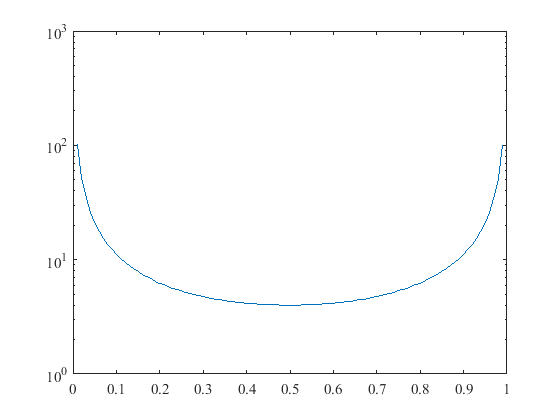

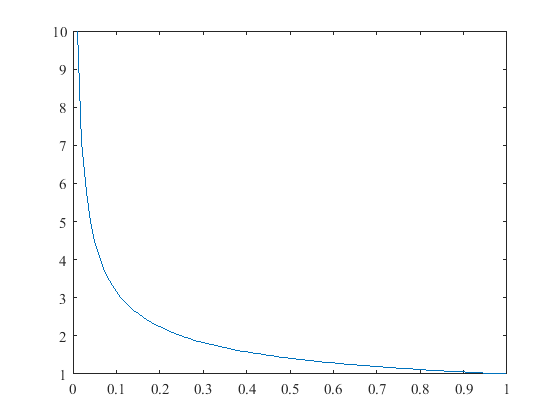

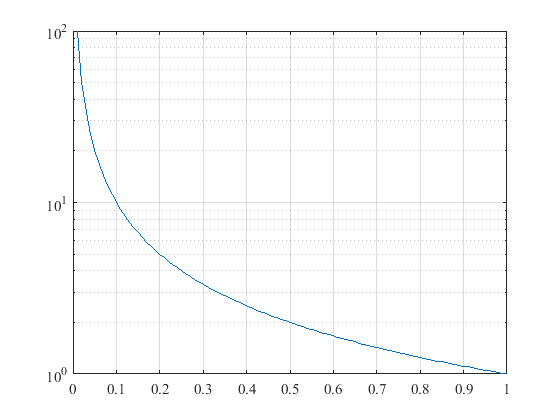

In [37]:
d = 2;
Np = 2;%d+d*(d+1)/2

alpha = [0:0.01:1];
p_alpha = (alpha).^(-Np/2);
n=1000;
l=1/2*log(n)

semilogy(alpha,p_alpha); grid on 

figure;
plot(alpha, exp(-(1/2*log(alpha))))

figure;
semilogy(alpha, (alpha.*(1-alpha)).^(-1))




  ==> Estimating the Number of Clusters for example  41
  = = running on K-means clustering at k= 2
  = = running on K-means clustering at k= 3
  = = running on K-means clustering at k= 4Warning: Failed to converge in 100 iterations.
> In kmeans/loopBody (line 466)
  In internal.stats.parallel.smartForReduce (line 136)
  In kmeans (line 335)
  In test_mainClusterValidationNC (line 98)

  = = running on K-means clustering at k= 5Warning: Failed to converge in 100 iterations.
> In kmeans/loopBody (line 466)
  In internal.stats.parallel.smartForReduce (line 136)
  In kmeans (line 335)
  In test_mainClusterValidationNC (line 98)


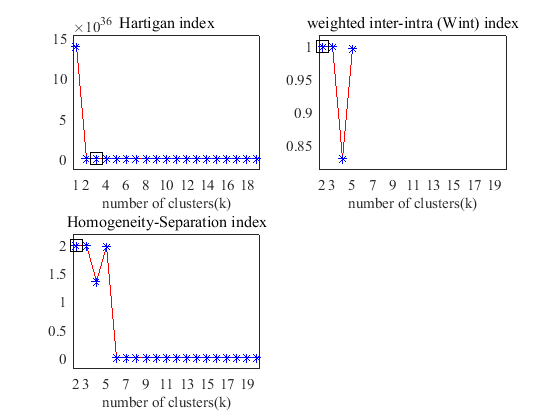

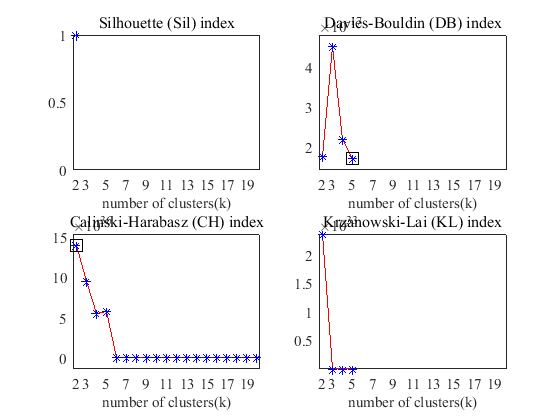

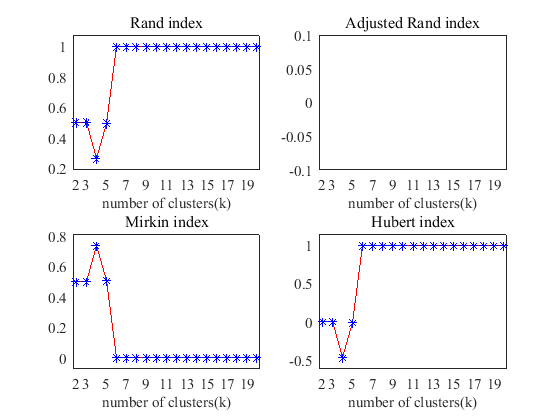

In [1]:
clear all;
cd /home/jacob/panning_project/test_programs
load mats/panning_data2.mat;
k=7;
data = panning_data.*[1/45 1/(200e-6*44100)];
%[labels,centers] = kmeans(X.*[1/45 1/(200e-6*44100)],k,'Distance','cityblock','Replicates',12);
%[T, W, B, Sintra, Sinter] = valid_sumsqures(X,labels,k);
test_mainClusterValidationNC


### Initialization of the EM
Given the data set, the aim is to estimate the corresponding unknown parameter vector $\boldsymbol{\mathbf{\theta}}$. However, the data set is unlabelled and it is unknown which component generated each data point, but the $K$-means gives us a way of partitioning points into $K$
clusters. Once we have estimated which points go to which cluster,
we can estimate a Gaussian mean and covariance for that
cluster. It is unlikely that the guess is right the first time, but based on the initial estimates of parameters, it is possible to make
a better guess at pairing points with components, in an iterative procedure using the EM-algorithm. 
